<a href="https://colab.research.google.com/github/Drado91/MyPortfolio/blob/main/Dudi_InterviewQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAMPL Lab interview questions: Implementing Deep Learning


In this excercise, you will implement a 1-layer fully connected network to map random 2D arrays of noise to randomly assigned classes (AKA labels or targets). 
The questions appear in increasing difficulty levels.
We will use the PyTorch library.


## The Excercise
Follow the instructions in the following boxes
Lines that contain "pass" commands and variables set to "None" should be replaced by your answers

In [ ]:
# Question 1  : Write import statements for:
#          1.1: the "torch" module
#          1.2: the "torchvision.transforms" module (name it "transforms")
#          1.3: the "FakeData" class of the "torchvision.datasets" module
#          1.4: the class used for loading data into neural networks in "PyTorch"
import torch
import torchvision.transforms as transforms
from torchvision.datasets import FakeData
import torch.utils.data

In [ ]:
# Question 2.1: check for cuda (GPU usage) availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'using {device}')

# Question 2.2: define the device ("torch.device" class instance) used for storing training data and models
# Requirements: device type should depend on cuda availability!
pass #2.2 answer is combined at 2.1 answer

using cpu


In [ ]:
# Question 3.1: Create a fake dataset using the "FakeData" class
# Requirements: dataset should be a total 4 images, image's shape (1,2,2) and 4 classes
#               When initializing an instance of "FakeData", set its "transform" argument to be the "to_tensor" callable
to_tensor = transforms.ToTensor()
dataset=FakeData(4, (1,2,2), 4,to_tensor)


In [ ]:
# Question 4.1: Define a linear model:
# Requirements: define a class that inherits from torch.nn.Module
#               construct a model with 1 fully connected layer
class NeuralNetwork(torch.nn.Module):
    def __init__(self, image_num_pix: int, num_classes: int):
        """
        Parameters
        ----------
        image_num_pix : number of pixels in image
        num_classes   : number of classes
        """

        # Initialize as any other torch.nn.Module
        super(NeuralNetwork, self).__init__()
        # Define attributes
        # Technical overhead: Save number of pixels to reshape images into vectors
        self.in_features = image_num_pix
        # Define the fully connected layer
        self.lyr1 = torch.nn.Linear(image_num_pix,num_classes)

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # Technical overhead: Used to reshape to avoid RuntimeError when processing 2D data
        img_1 = torch.reshape(img, (img.shape[0], self.in_features))
        # Calculate forward pass using reshape image ("img_1") as input
        output = self.lyr1(img_1)
        return output


# Parameters
num_pix=sum(dataset.image_size[1:])
num_cla=dataset.num_classes
# Question 4.2: Construct model
model = NeuralNetwork(num_pix,num_cla)
# Question 4.3: move model to device
model.to(device)

NeuralNetwork(
  (lyr1): Linear(in_features=4, out_features=4, bias=True)
)

In [ ]:
# Question 5.1: define optimizer and loss
# Requirements: optimizer should be Adam, loss should be cross entropy
#               both should be callables. implementations are available in PyTorch and can be used here, like we did with "FakeData"
#               set the optimizer's learning rate to be 1e-2
optimizer = torch.optim.Adam(model.parameters(),lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Question 6.1: Create an Instance of the class mentioned in Q1.4 for loading the data in batches
# Requirements: set batch size to be 2
#               data should be shuffled during each epoch
train_loader = torch.utils.data.DataLoader(dataset,batch_size=2,shuffle=True)


In [ ]:
# Question 7.1: Write a training loop for 50 epochs
# Question 7.2: insert the inputs to the device in the for loop.
from tqdm import tqdm  # This is used for a fancy training progress bar


max_epochs = 500
# initialize list of losses vs. epochs
loss_list = []
def train(model, train_loader, optimizer, criterion, max_epochs=0):
    for epoch in tqdm(range(max_epochs)):
        #  initialize average loss value
        loss_mean = 0
        # Train 1 Epoch: loop over batches
        for batch_idx, batch in enumerate(train_loader):
            # Train 1 batch
            # organize batch to samples and tragets
            samples, targets = batch
            # zero the optimizer gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(samples)
            # Calculate loss
            loss=criterion(outputs, targets)
            # Back-propagation
            loss.backward()
            # optimizer step
            optimizer.step()
            # aggregate loss
            loss_mean += loss.item()
        # Normalize loss
        loss_mean /= (batch_idx + 1)
        # Add loss to list
        loss_list.append(loss_mean)
    return loss_list

loss_list = train(model,train_loader,optimizer,criterion,max_epochs)


100%|██████████| 500/500 [00:01<00:00, 255.35it/s]


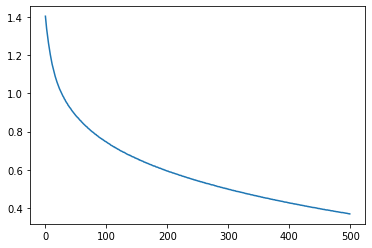

In [ ]:
# Question 8.1: plot loss during training
import matplotlib.pyplot as plt

def plot_loss(loss_list):
    plt.figure()
    plt.plot(loss_list)
    plt.show()

plot_loss(loss_list)

## Questions
1. What is the effect of different number of epochs? different learning rate? 

ANSWER: Number of epochs parameter (how many times the model learns the whole data) effect on the relationship between the data to the model. For too small number of epochs, let say one, the model learns the data only once - this could lead to underfit (high loss, model cannot learn the data properly). one the other hand, very large number of epochs can lead to overfit (model fits exactly to the training set but not fits to testing set)

As for learning rate - the size of the step. High learning rate allows the model to learn faster but could miss the global minimum of loss function. Low learning rate could lead the model to find global minimum but could be very slow (need much more epochs to get there)

2. What happens to the training if we increase the number of images but NOT the number of classes? Supply a reasonable explanation and show an informative graph(s)

If we increase the number of images but not the number of classes (In this case, that dataset is generated randomly) the model will be less accurate because it becomes more complicated for neurons to find the connection between sample and label. Loss becomes noisy as the number of images increases.

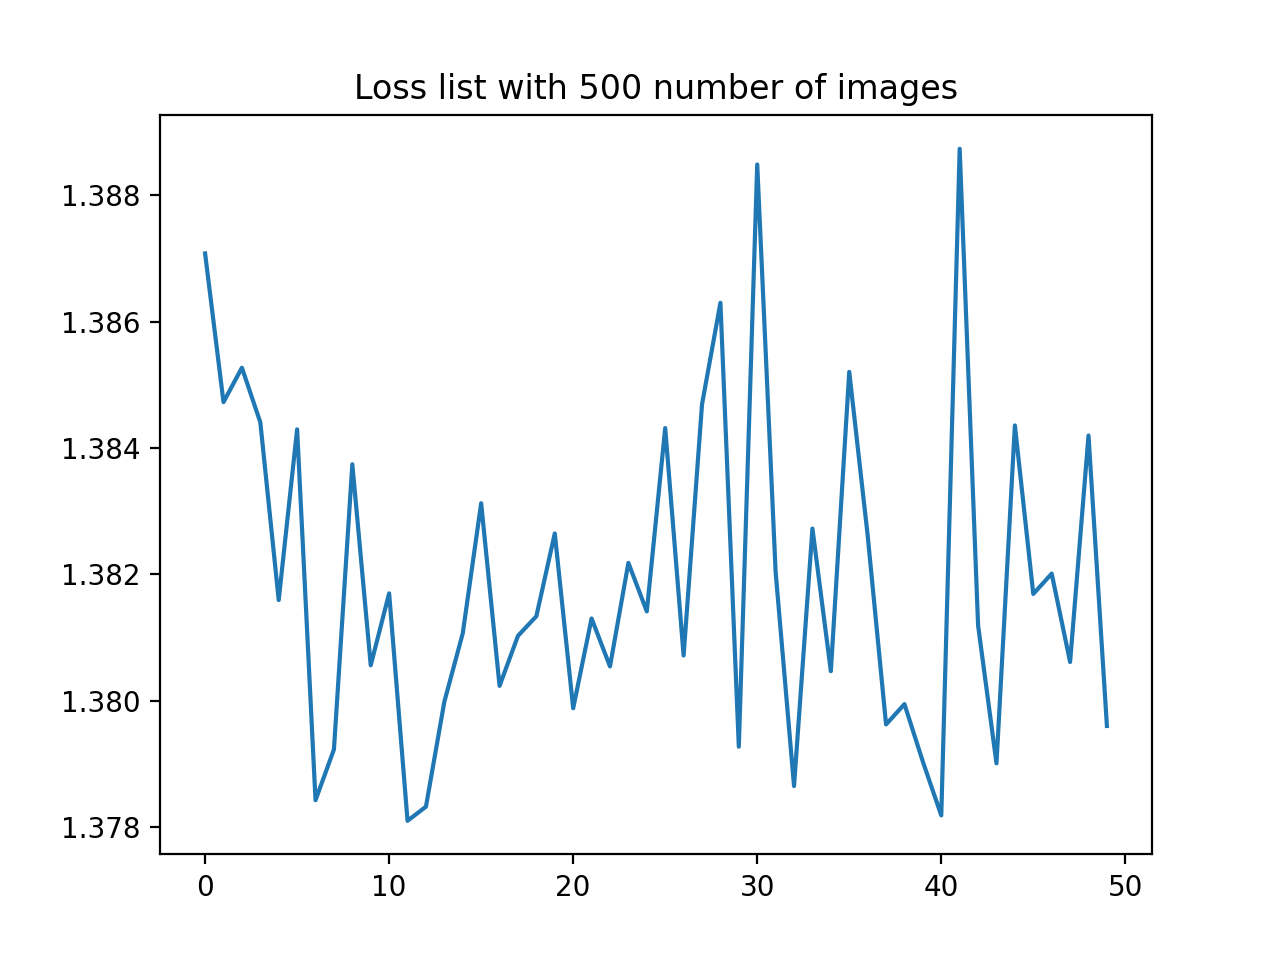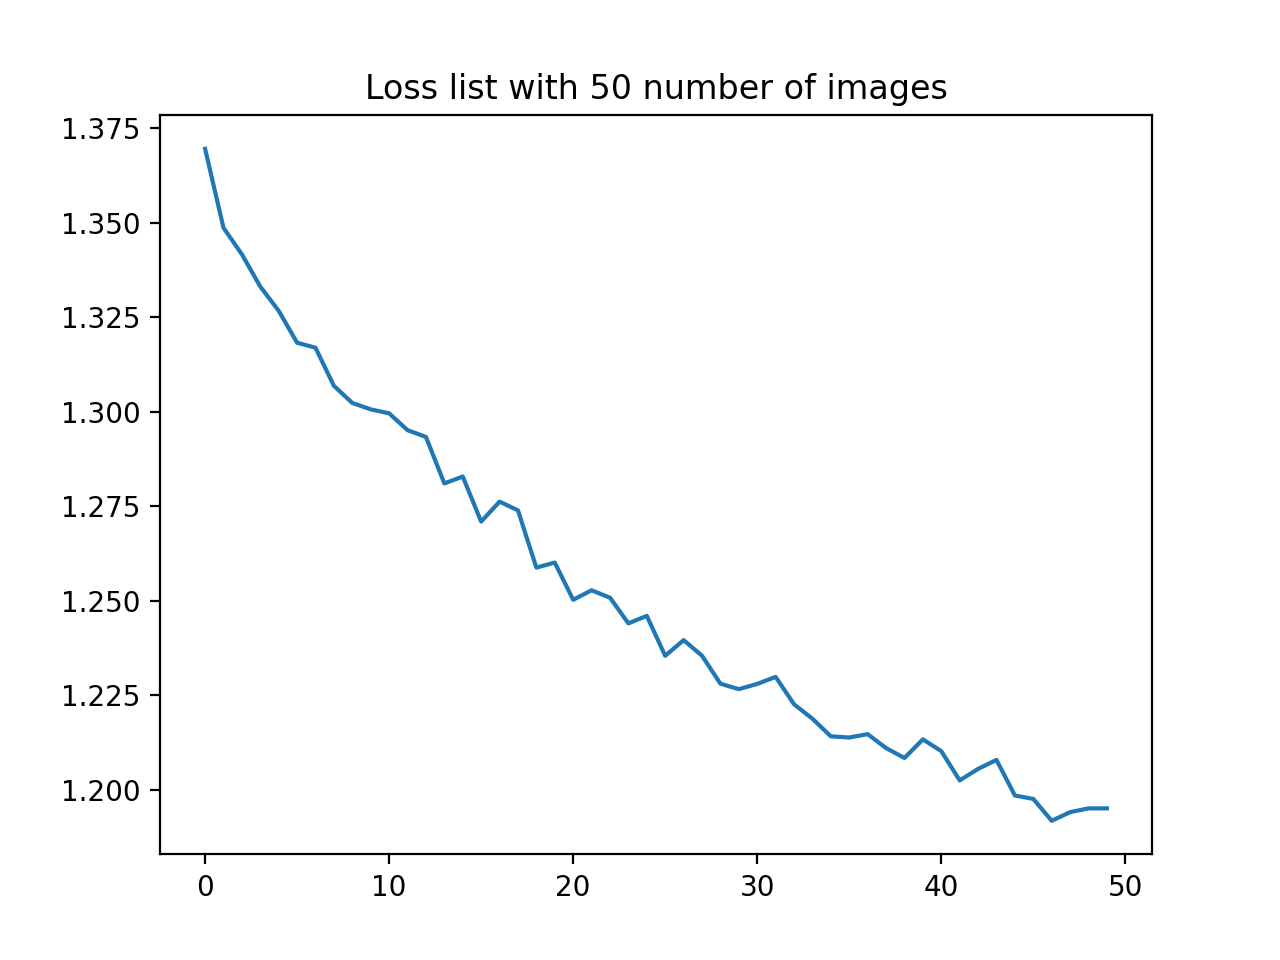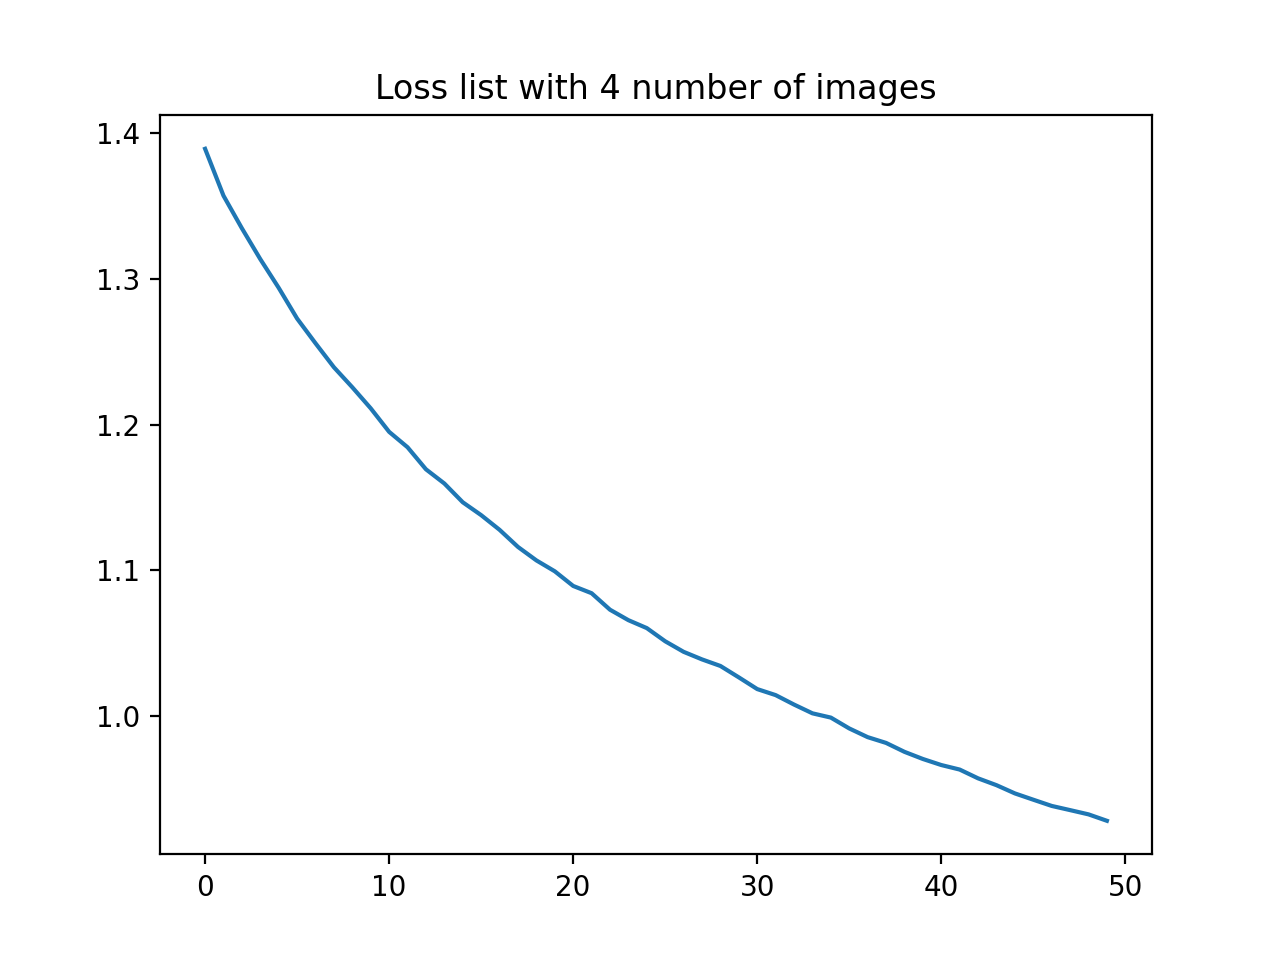





3. What happens to the training time if we increase the images' size? What would happen if the "device" variable was set differently?


ANSWER: If we increase image size, training time should increase too. In this case, probably more features are needed for the model, as result, more computational operations are needed. if the "device" variable was set differently,  in my case - if it was set to 'GPU' the training time would be much faster. GPUs are faster and more efficient for these kinds of operations.


4. How would you support different dataset images size (different input for "FakeData"'s constructor's "image_size" parameter), without modifying your model?

ANSWER: I would change the resolution of the dataset with max pooling or average pooling (outside to the model) in order to make the dataset shape to fit the model input shape.


5. Consider adding a validation set. How would you expect its loss to behave? How would you cause it to behave differently?

ANSWER: In this specific case of 'FakeData' I would expect the loss to be worse than the training. If the data generates randomly and there's no real connection between samples and their label the model should be overfitted.
In the general case, when we expect to some connection between samples and their label I would expect the loss to behave similiar (but little worse) to training loss.

In order to make it behave differently I would generate validation set out of training set. For example validation=torch.add(train,1) or more complex transformations.

6. How would you measure your model robustness to noise?

ANSWER:
In order to measure the robustness of model to noise, after finish training part I would make some copy of data and add noise with different variance to each duplicate (for example gaussian noise for each pixel).In iterative way I would input data with different variance to the trained model. At the end of this process I would plot a graph of Loss as a function of Noise Variance (or Accuracy vs Noise Variance) and see how the model behaves. If Accuracy stays the same it means that the model is robust to noise (noise of the kind i've tested).

7. Write your own question.

ANSWER: I have few, answer whatever you want :)
1. What would happen to the model if I change the learning rate to be adaptive learning rate? (not constant, function of epochs for example).
2. Is the data that generated from 'FakeData' has a correlation between samples of the same label? This information could affect a few of the above answers.
3. What is the largest challenge when creating a model? Data/Architecture/Model Paramets/Other? why?
